## Wieght initialization is important
1. Initialize the opttimization algorithm
2. Choose an optimization Algorithm
3. Repeat these steps
  - Forwad propogate in an input
  - Compute the cost function
  - compute the gradient of cost function w.r.t parameters  using backpropogation
  - Update each parameter using the gradients, according to optimication algorithm

## problem with making neural network
    - vanishing GD( due to sigmoid, wrong wieght initialization)
    - Exploding GD
    - Slow convergence
        

# what not to do 
 - case1: zero initialization of weights resulting no training of model.
 - case2 : Non zero constant value resaulting same weight after update in case of relu and tanh.
 - case3 : Random Initialization of weights
          - Type: small ramdomization (tanh and sigmoid)
          - Type: large randomization (relu) 
          
  - if give very small wieghts in case of tanh thier will be vanishing gradient problem and aslo in case of relu it will be slowly converge.   - if wieghts value(0-1) in case sigmoid, tanh saturtation(max=1 or -1) leads to slow training or VGD.
  - in case of relu Exploding gradient descent problem leads to unstable gradient.
  
**You can't initialized weights with zero, non-zero same or constant, small random, large random**  

- Tn short we need random weights with good variance or range is not very large or very small

## Heuraistics approach of W.I. 
### Xavier/Glorant initialization of weights
 - formula: sqrt(1/fan.in)
          : aqrt(2/fan.in + fan.out)
 - Type: Normal and uniform

### He  initilization of weights
 - Type: Normal and uniform
 
**tanh and sigmoid Xavier, relu He initialization**

- 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df= pd.read_csv("binary.csv")
df.head()

,X,Y,Type
0,0.095,0.365,M
1,0.090,0.265,M
2,0.135,0.420,F
3,0.125,0.365,M
4,0.150,0.415,F


In [40]:
tf = {"M":1,"F":0}

In [46]:
df.Type = df.Type.map(tf)

In [47]:
df.head()

,X,Y,Type
0,0.095,0.365,1
1,0.090,0.265,1
2,0.135,0.420,0
3,0.125,0.365,1
4,0.150,0.415,0


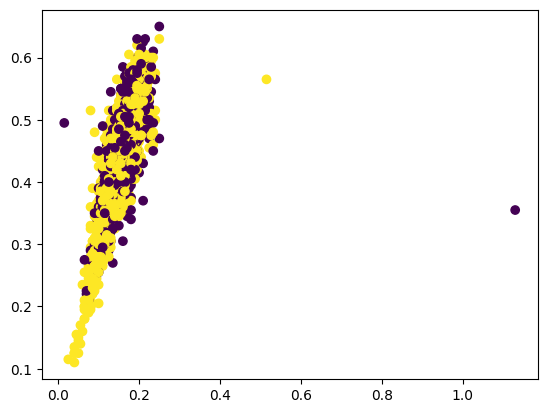

In [48]:
plt.scatter(df['X'],df['Y'],c=df['Type'])

In [49]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [50]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [52]:
initial_weights = model.get_weights()

In [53]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [54]:
model.set_weights(initial_weights)

In [55]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
71/71 [==============================] - 3s 9ms/step - loss: 0.6915 - accuracy: 0.5388 - val_loss: 0.6909 - val_accuracy: 0.5397
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5388 - val_loss: 0.6908 - val_accuracy: 0.5397
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5388 - val_loss: 0.6907 - val_accuracy: 0.5397
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5388 - val_loss: 0.6906 - val_accuracy: 0.5397
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5388 - val_loss: 0.6905 - val_accuracy: 0.5397
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5388 - val_loss: 0.6905 - val_accuracy: 0.5397
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5388 - val_loss: 0.6904 - val_accuracy: 0.5397
Epoch 8/100
7

Epoch 59/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5370 - val_loss: 0.6827 - val_accuracy: 0.5379
Epoch 60/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5335 - val_loss: 0.6827 - val_accuracy: 0.5432
Epoch 61/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5353 - val_loss: 0.6823 - val_accuracy: 0.5379
Epoch 62/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5472 - val_loss: 0.6855 - val_accuracy: 0.5132
Epoch 63/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5256 - val_loss: 0.6820 - val_accuracy: 0.5397
Epoch 64/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5379 - val_loss: 0.6822 - val_accuracy: 0.5397
Epoch 65/100
71/71 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5419 - val_loss: 0.6833 - val_accuracy: 0.5362
Epoch 

9600/9600 [==============================] - 19s 2ms/step


<AxesSubplot: >

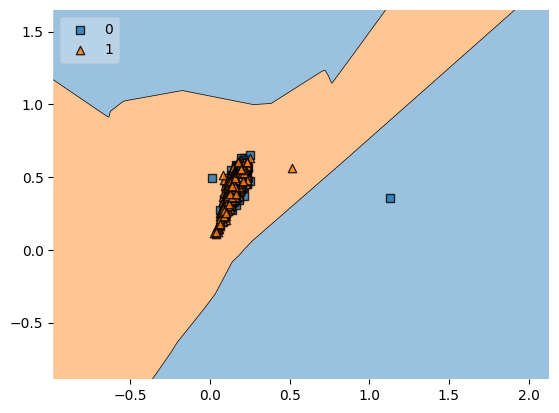

In [57]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)